In [55]:
from scapy.all import*
from math import*
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [73]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
files_add=find_the_way('./pcaps/','.pcap')

In [75]:
def pcap2list(payload):
    for ii in payload:
        temp=str(hex(ii).split('x')[-1])
        if len(temp)==2:
            listem.append( int(temp[0], 16))
            listem.append( int(temp[1], 16))
        else:
            listem.append( int("0", 16))
            listem.append( int(temp[0], 16))
    return listem

In [76]:
def pad(ls,size):
    for i in range(0,size-len(ls)):
        ls.append(0)
    return ls



=====================Aria\Setup-A-1-STA.pcap=====================



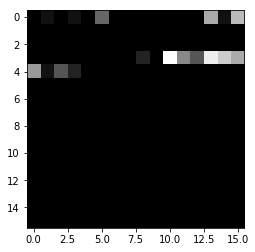

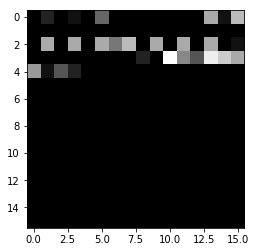

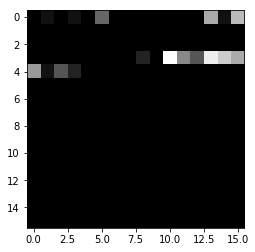

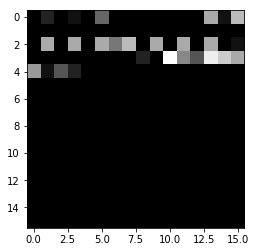

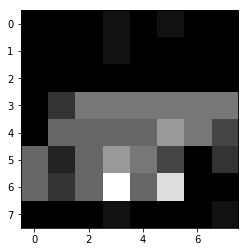

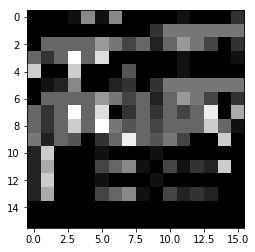

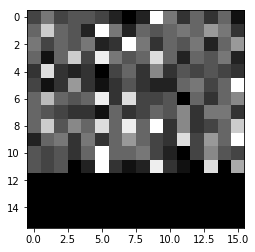

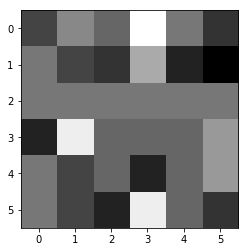

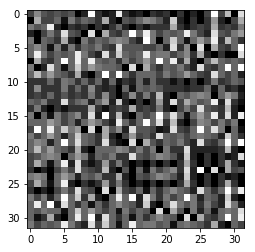

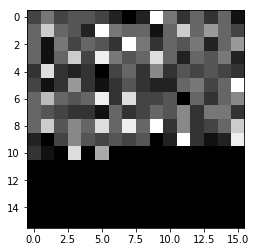

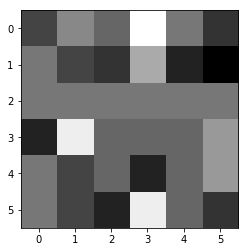



=====================D-LinkCam\Setup-A-1-STA.pcap=====================



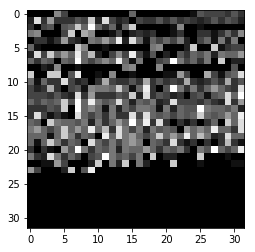

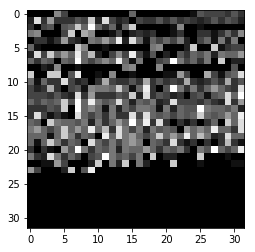

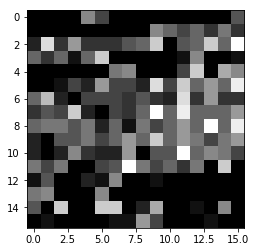

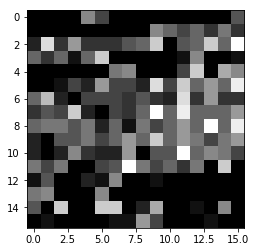

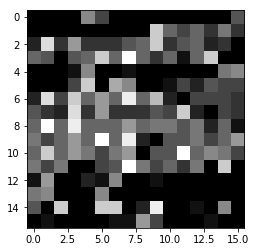

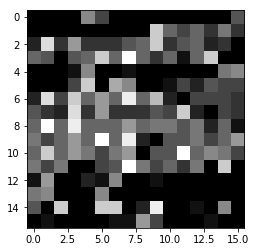

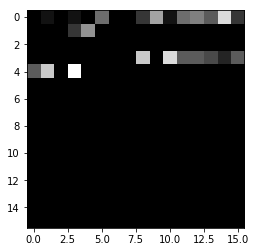

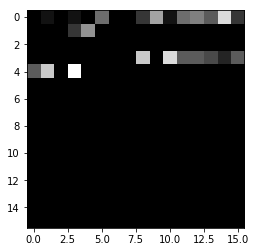

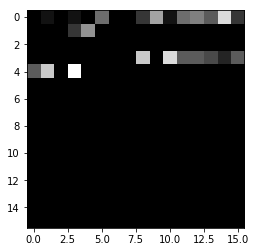

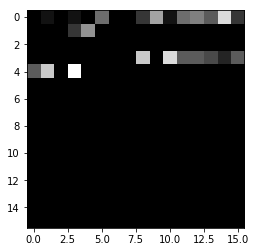

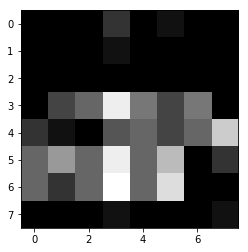



=====================D-LinkDayCam\Setup-A-1-STA.pcap=====================



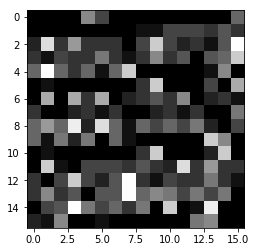

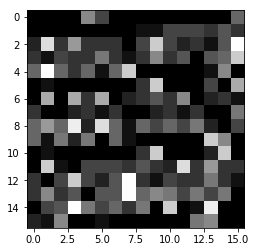

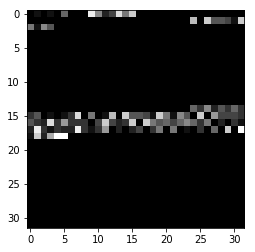

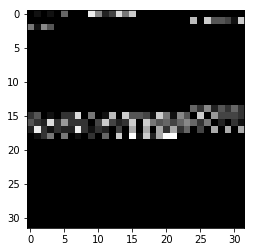

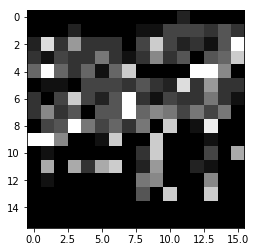

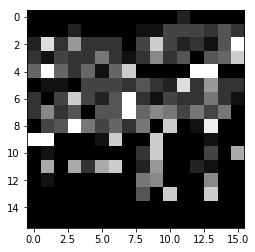

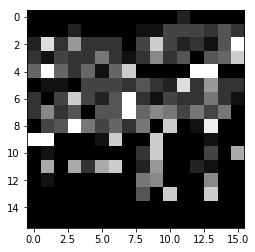

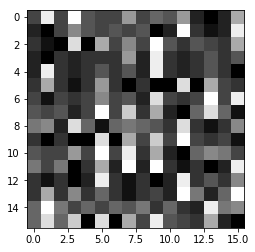

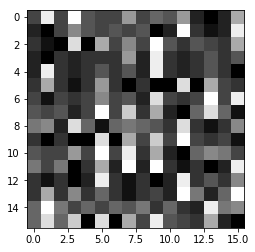

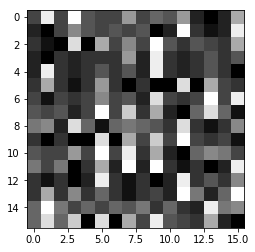

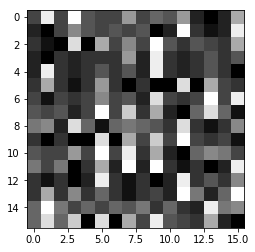



=====================D-LinkDoorSensor\Setup-C-1-STA.pcap=====================



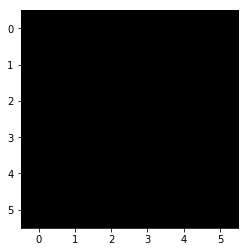

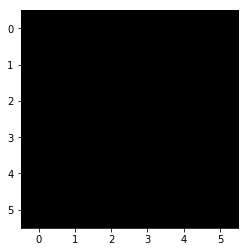

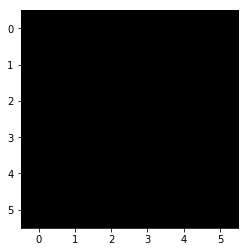

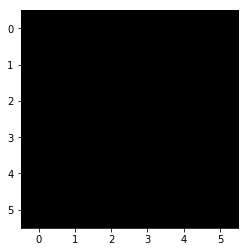

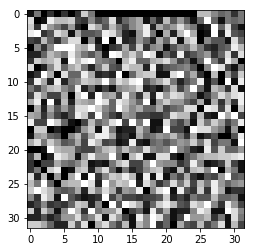

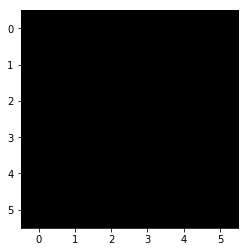

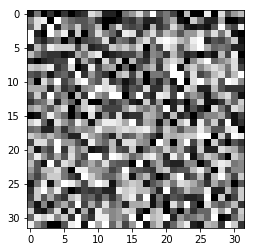

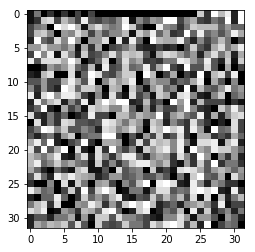

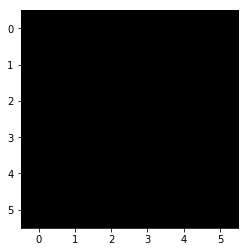

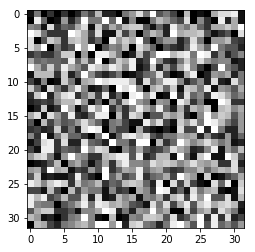

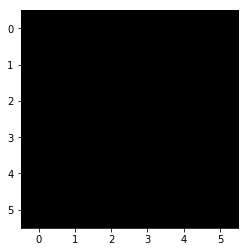



=====================D-LinkHomeHub\Setup-A-1-STA.pcap=====================



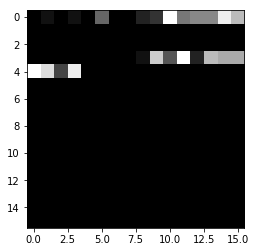

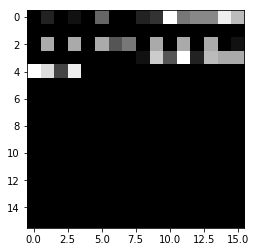

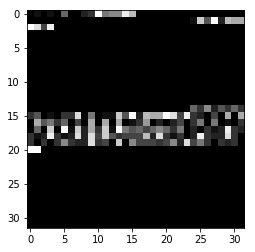

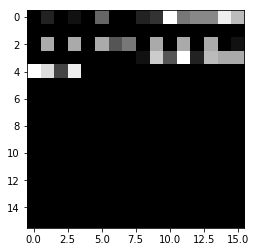

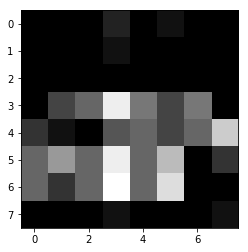

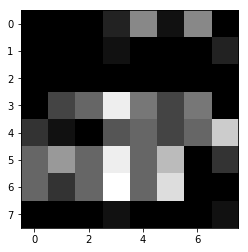

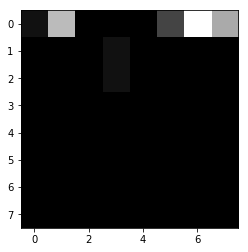

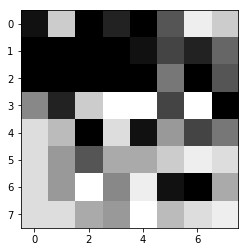

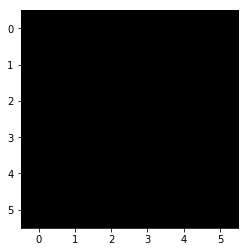

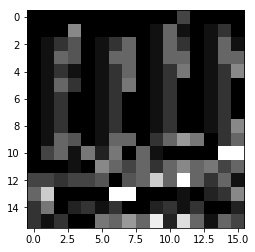

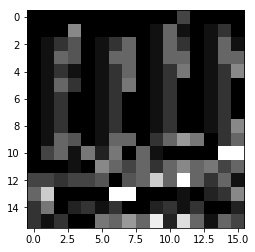



=====================D-LinkSensor\Setup-A-1-STA.pcap=====================



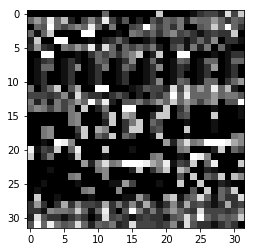

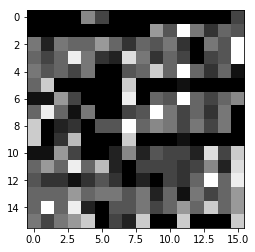

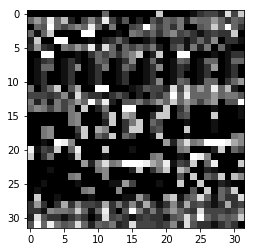

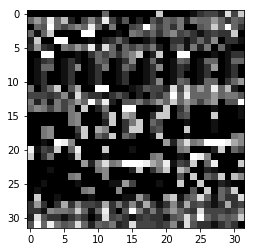

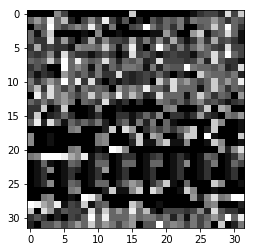

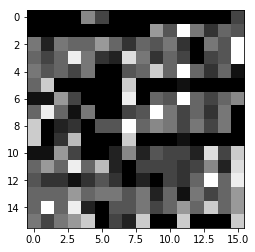

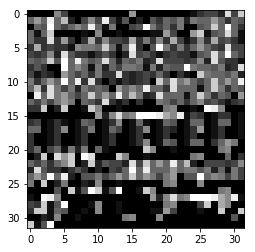

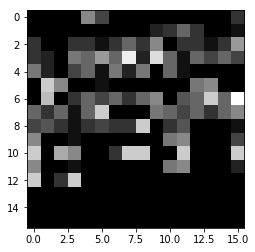

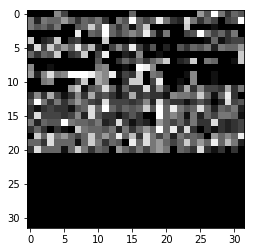

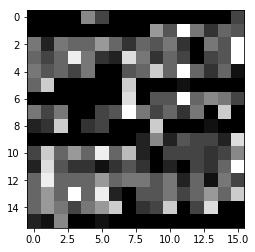

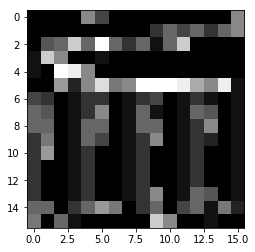



=====================D-LinkSiren\Setup-A-1-STA.pcap=====================



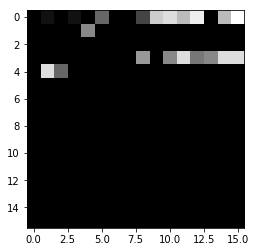

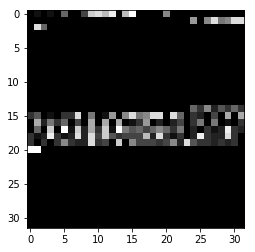

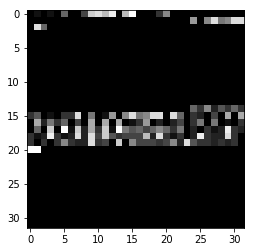

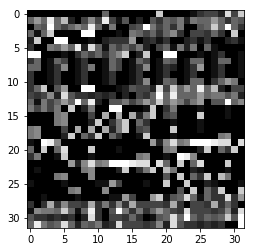

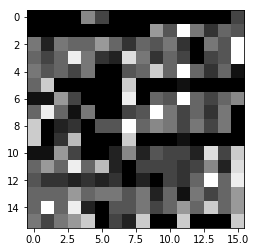

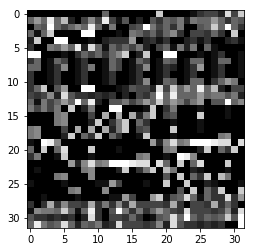

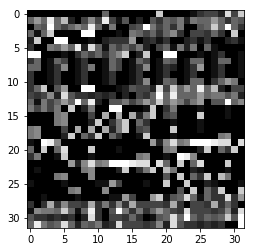

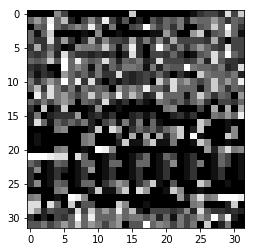

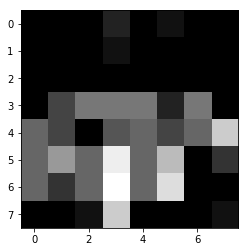

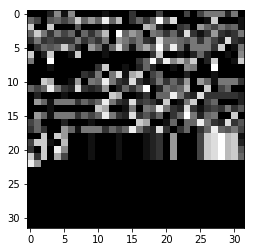

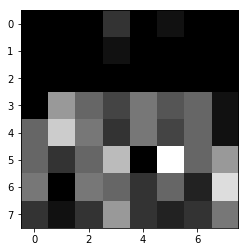



=====================D-LinkSwitch\Setup-A-1-STA.pcap=====================



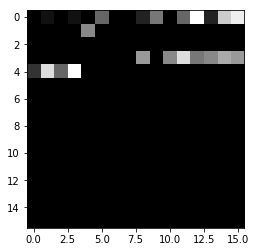

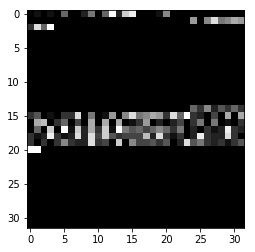

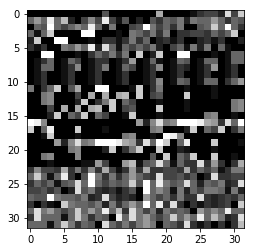

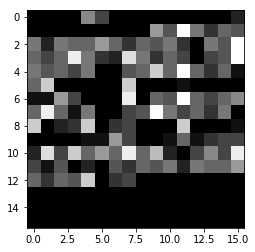

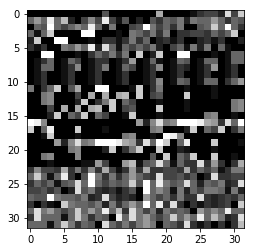

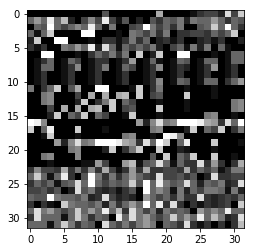

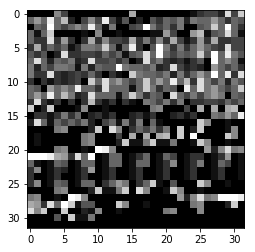

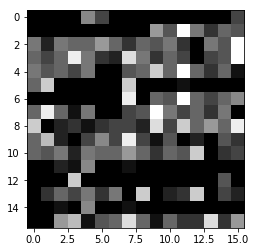

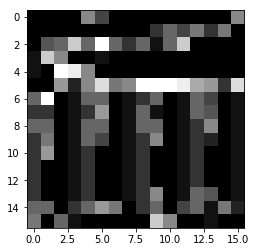

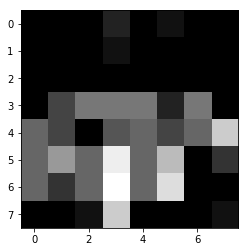

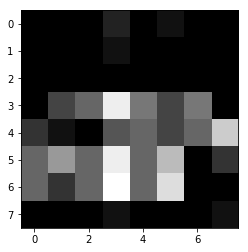



=====================D-LinkWaterSensor\Setup-A-1-STA.pcap=====================



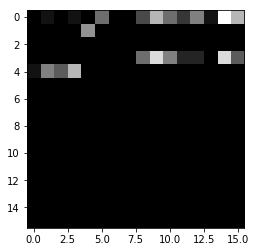

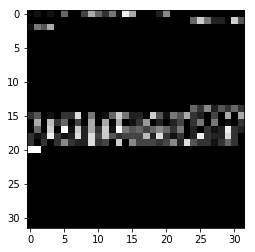

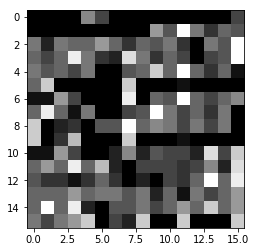

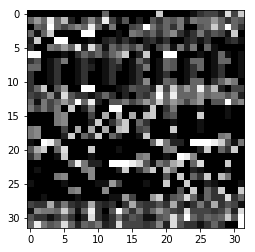

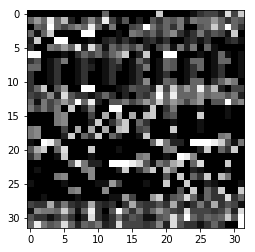

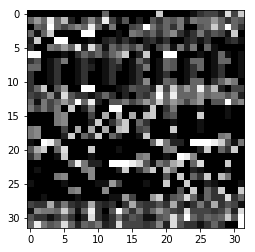

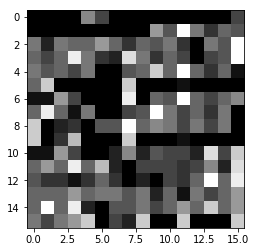

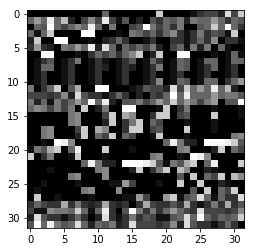

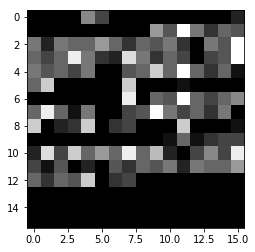

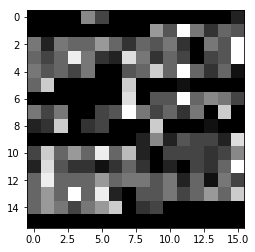

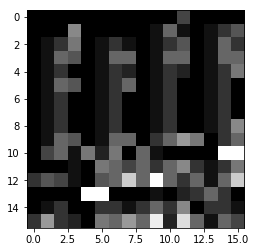



=====================EdimaxCam\Setup-A-1-STA.pcap=====================



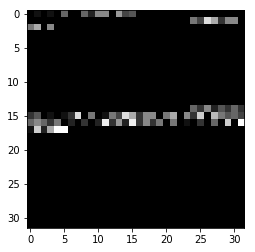

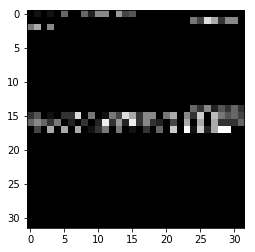

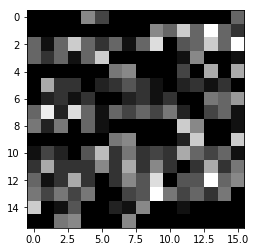

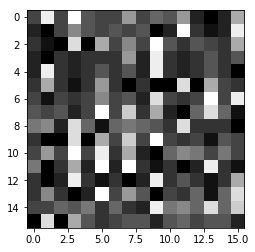

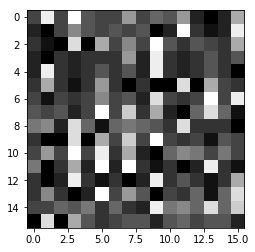

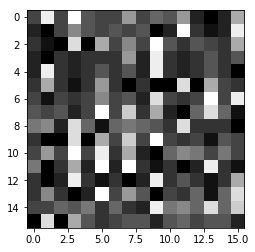

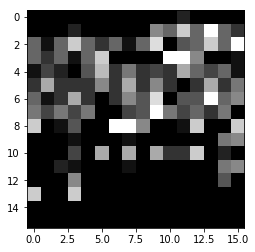

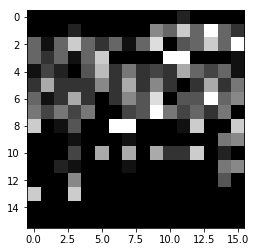

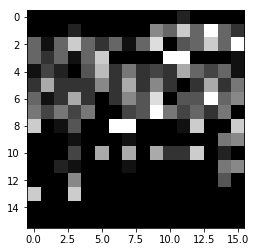

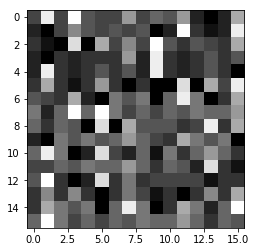

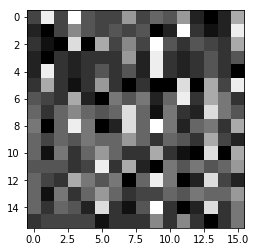



=====================EdimaxPlug1101W\Setup-A-1-STA.pcap=====================



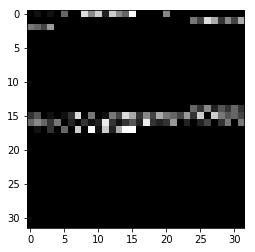

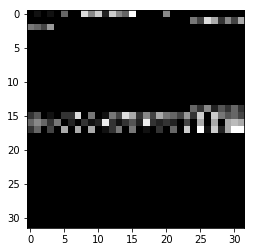

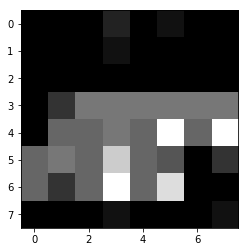

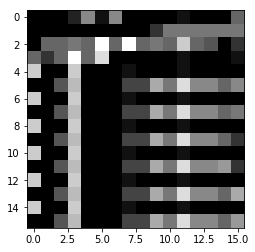

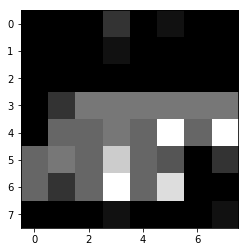

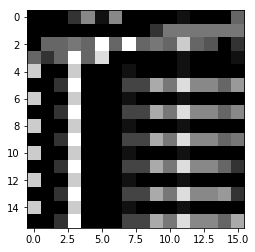

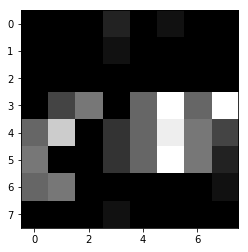

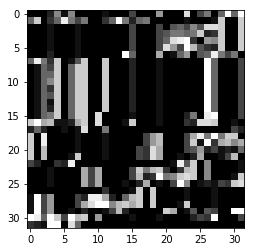

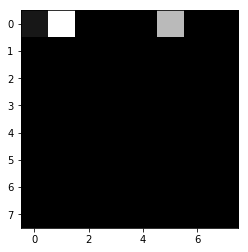

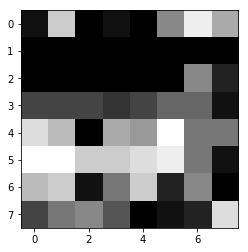

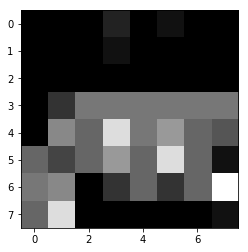



=====================EdimaxPlug2101W\Setup-A-1-STA.pcap=====================



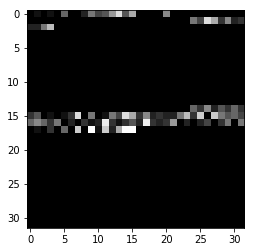

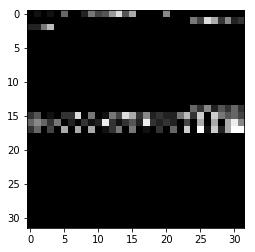

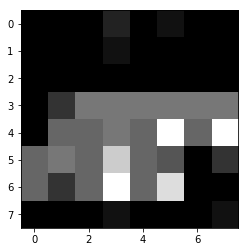

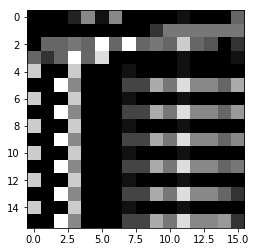

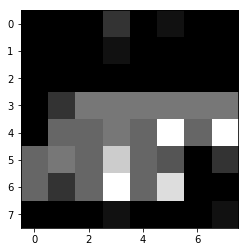

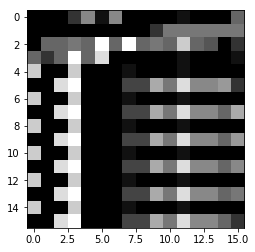

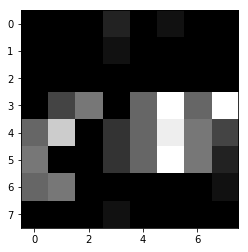

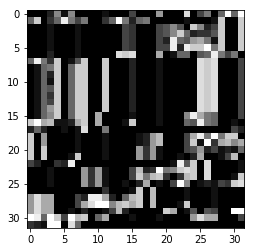

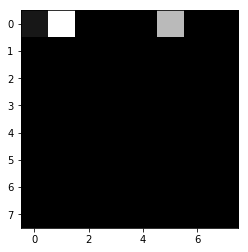

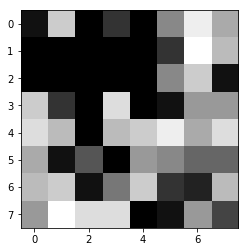

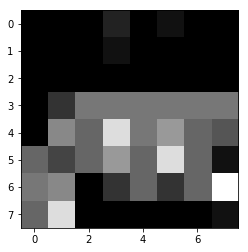



=====================EdnetCam\Setup-A-1-STA.pcap=====================



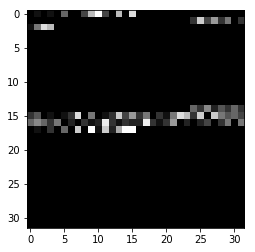

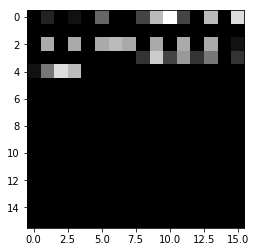

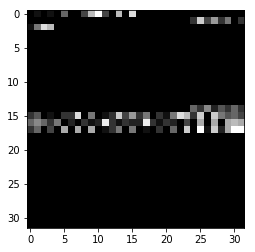

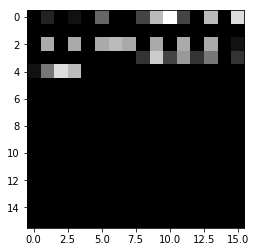

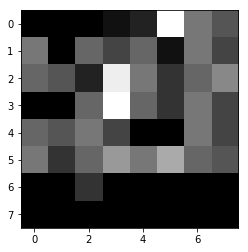

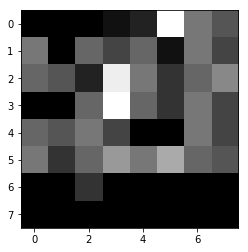

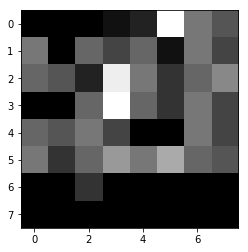

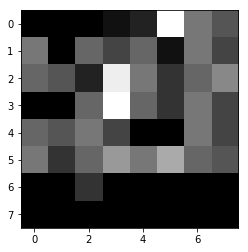

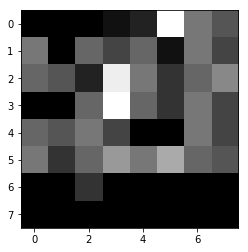

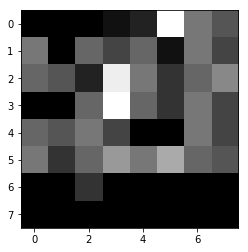

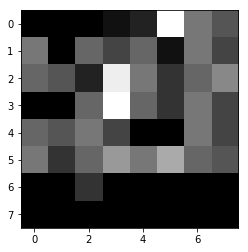



=====================EdnetGateway\Setup-A-1-STA.pcap=====================



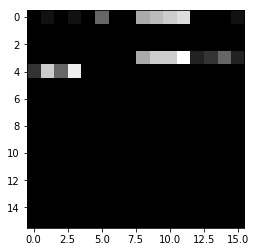

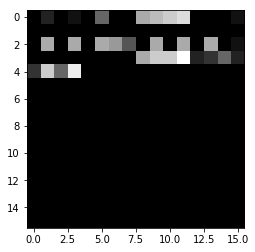

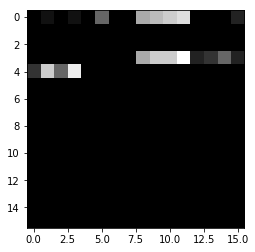

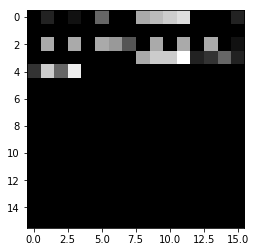

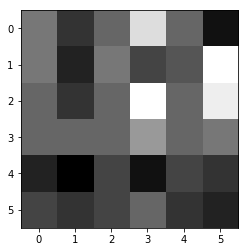

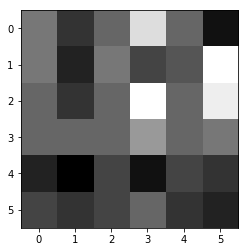

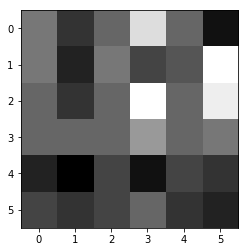

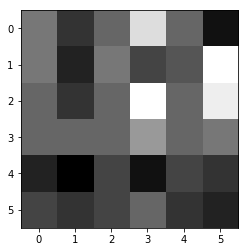

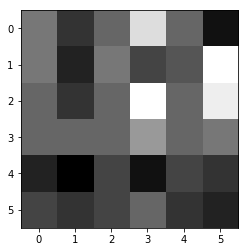

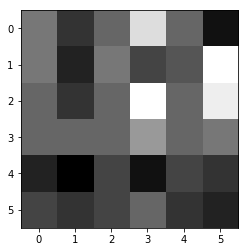

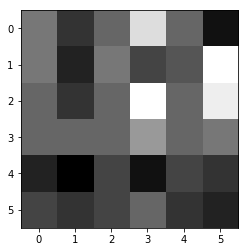



=====================HomeMaticPlug\Setup-C-1-STA.pcap=====================



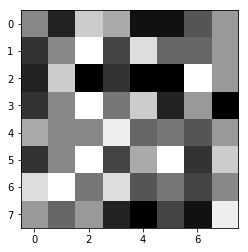

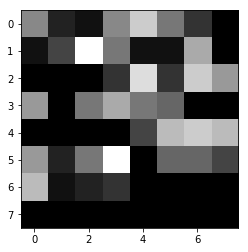

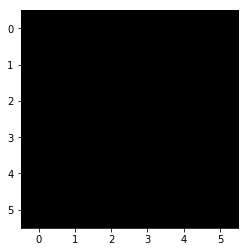

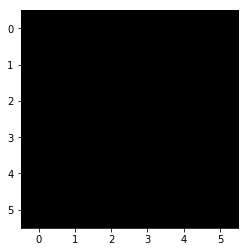

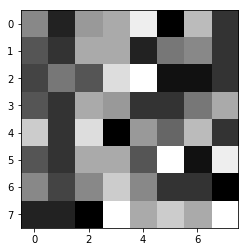

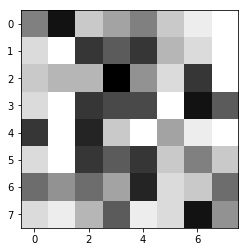

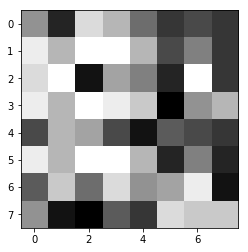

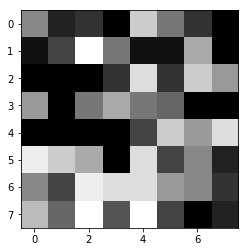

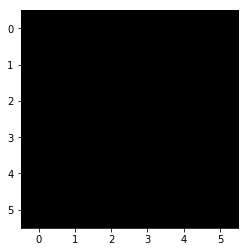

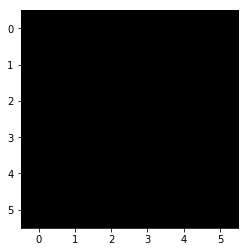

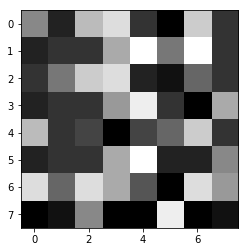



=====================HueBridge\Setup-A-1-STA.pcap=====================



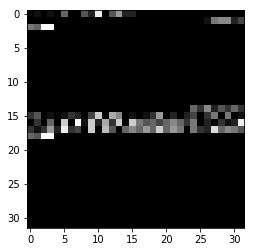

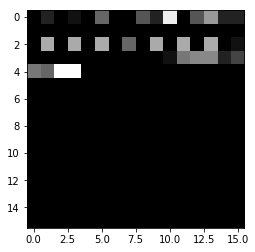

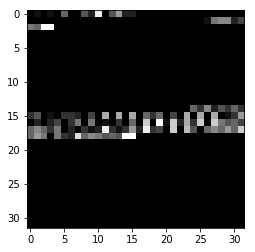

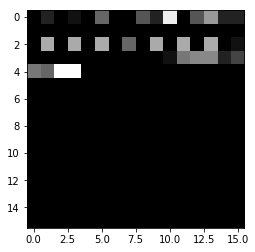

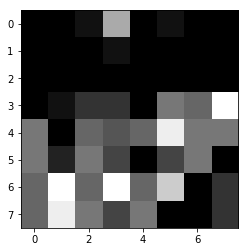

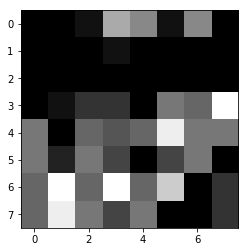

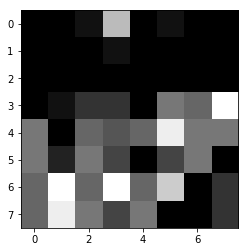

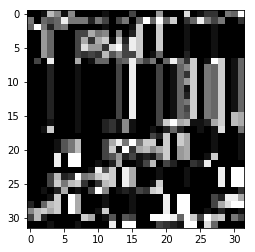

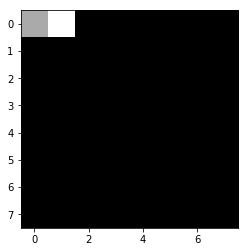

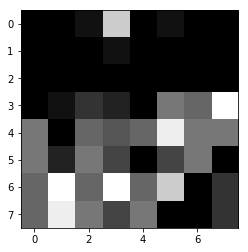

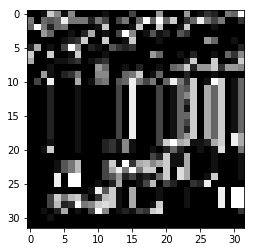



=====================HueSwitch\Setup-A-1-STA.pcap=====================



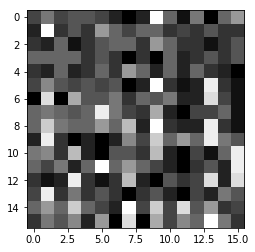

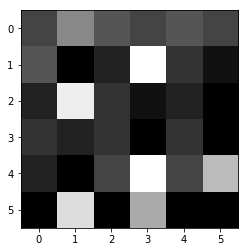

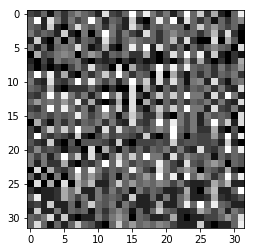

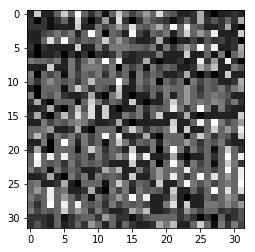

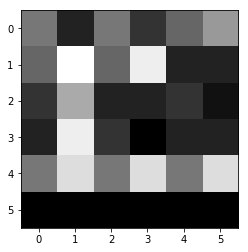

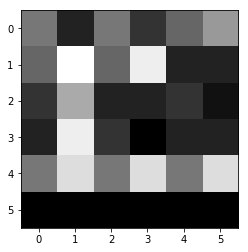

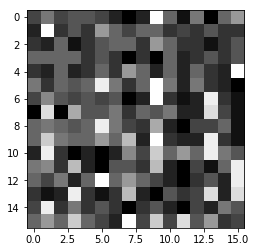

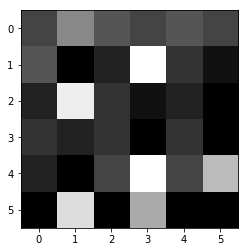

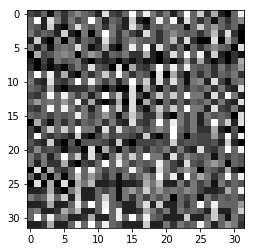

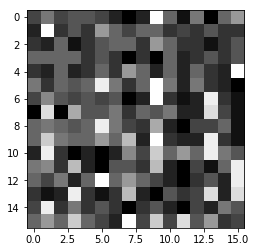

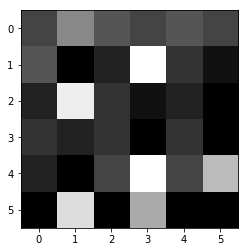



=====================iKettle2\Setup-A-1-STA.pcap=====================



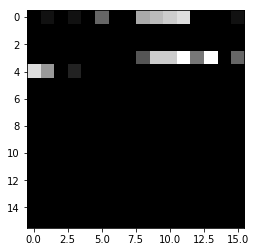

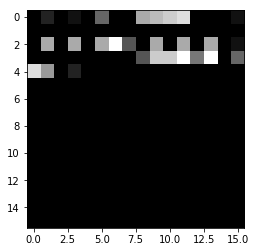

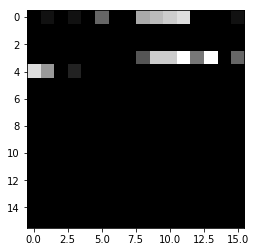

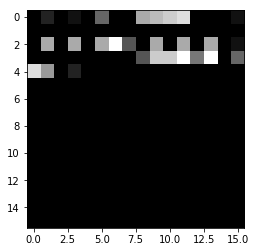



=====================Lightify\Setup-C-1-STA.pcap=====================



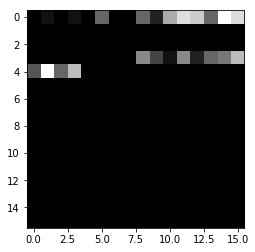

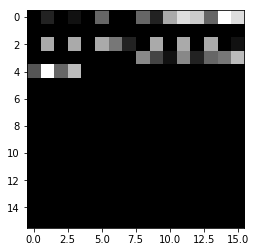

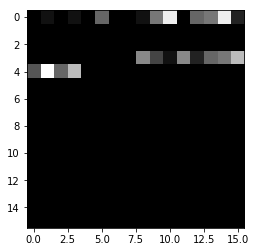

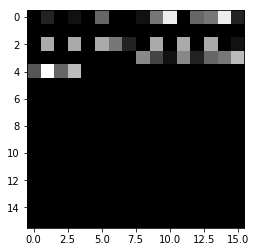

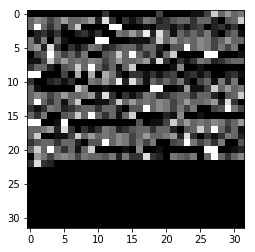

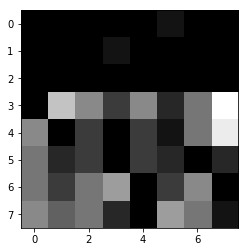

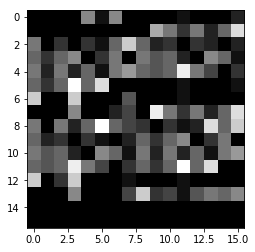

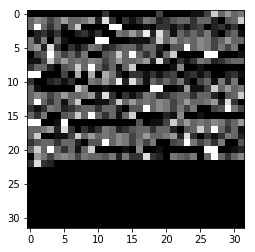

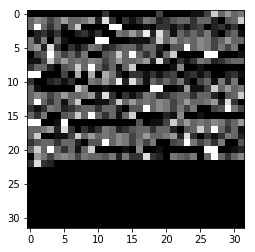

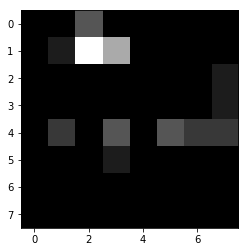

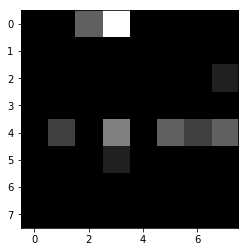



=====================MAXGateway\Setup-A-1-STA.pcap=====================



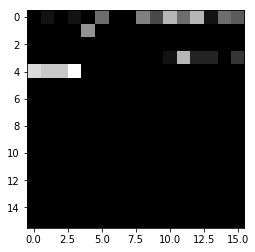

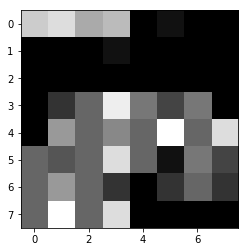

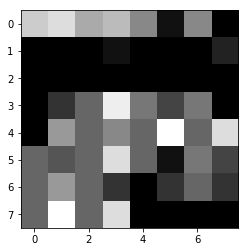

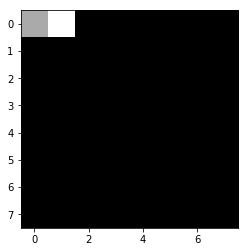

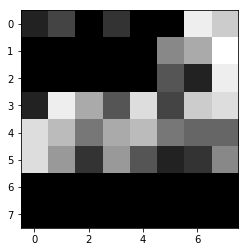

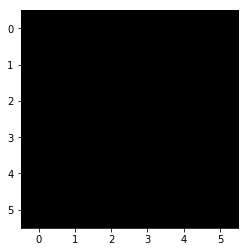

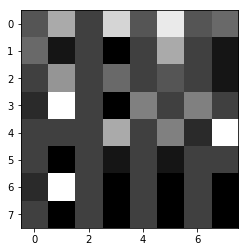

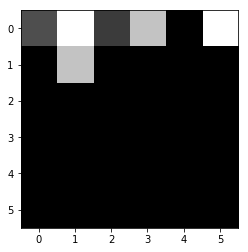

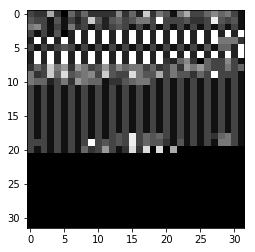

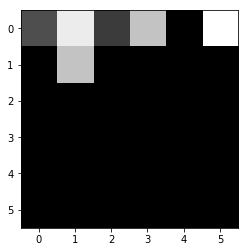

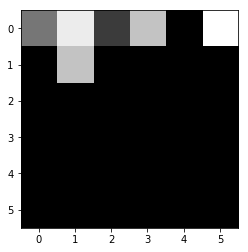



=====================SmarterCoffee\Setup-A-1-STA.pcap=====================



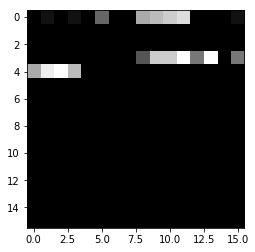

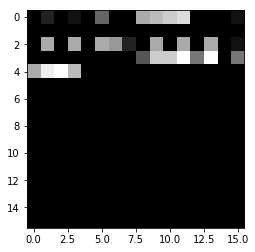

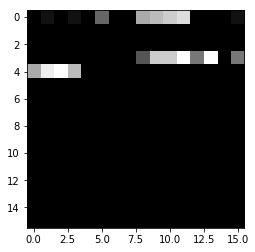

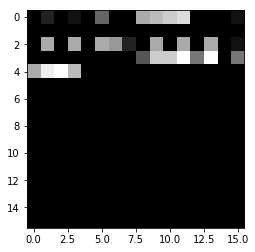



=====================TP-LinkPlugHS100\Setup-A-1-STA.pcap=====================



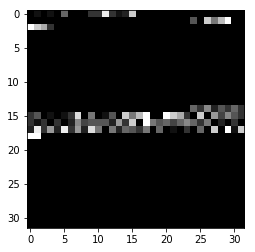

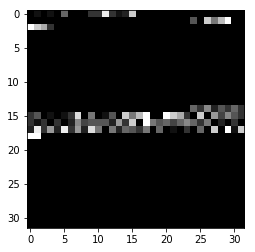

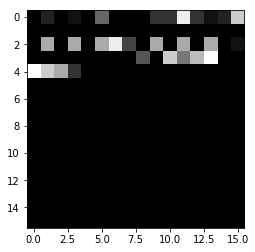

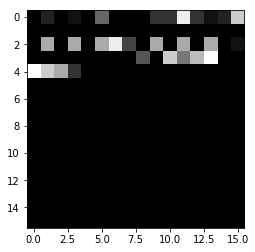

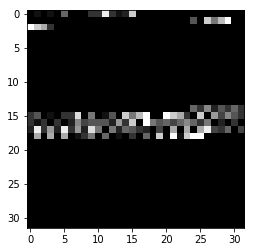

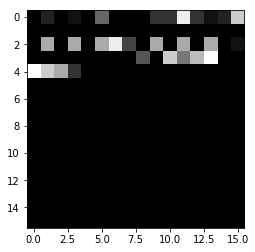

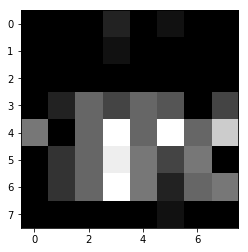

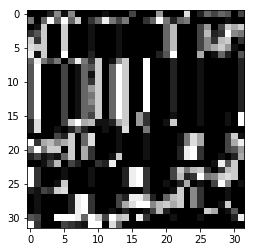

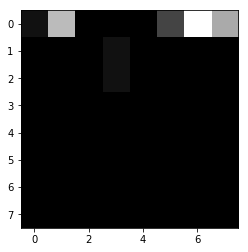

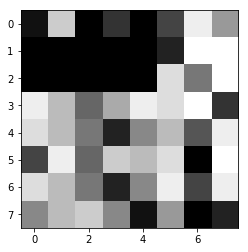

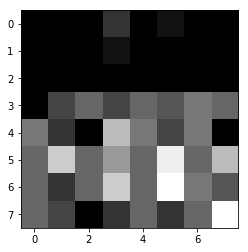



=====================TP-LinkPlugHS110\Setup-A-1-STA.pcap=====================



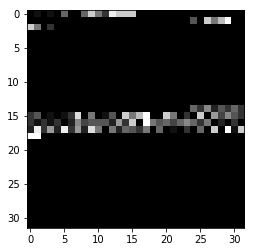

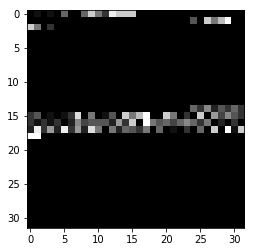

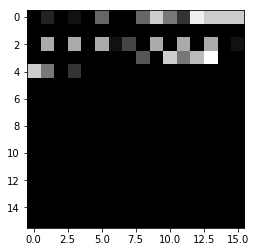

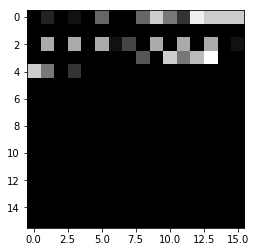

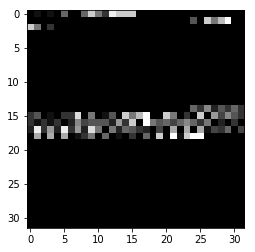

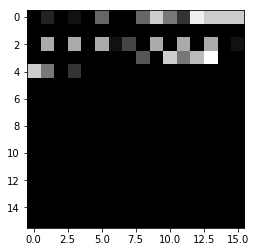

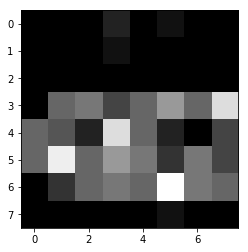

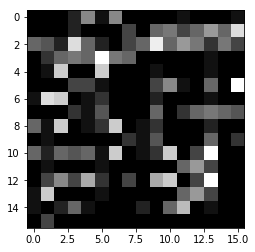

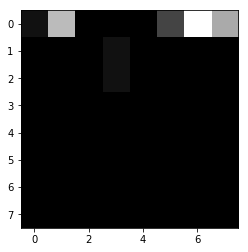

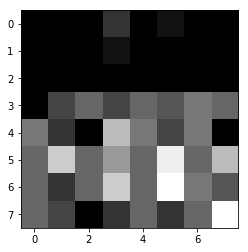

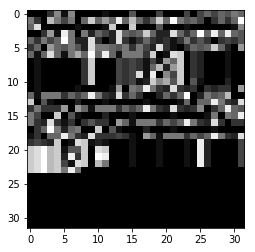



=====================WeMoInsightSwitch\Setup-A-1-STA.pcap=====================



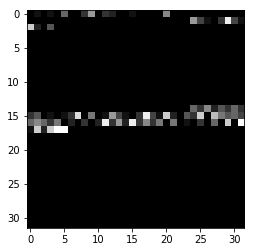

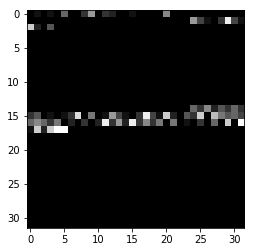

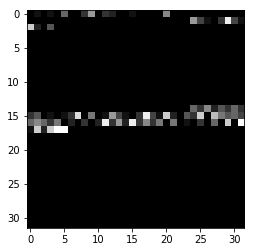

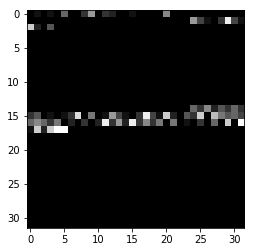

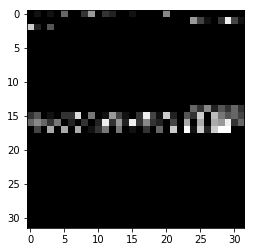

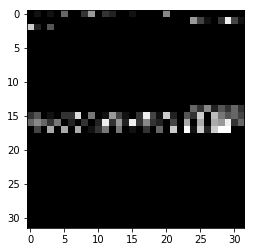

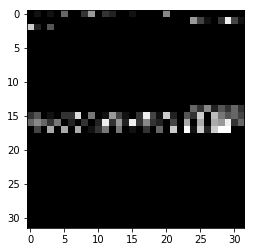

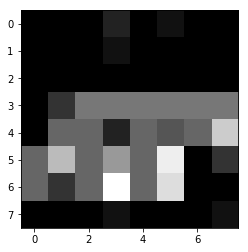

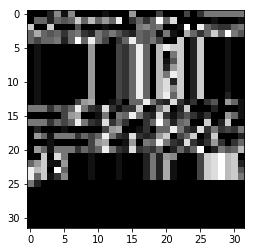

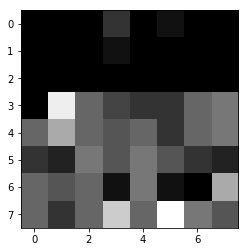

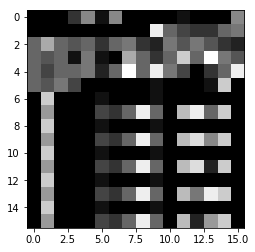



=====================WeMoLink\Setup-A-1-STA.pcap=====================



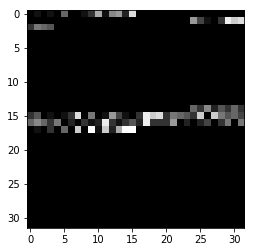

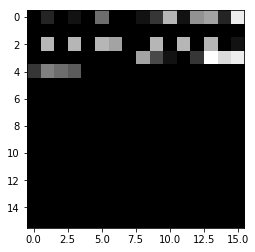

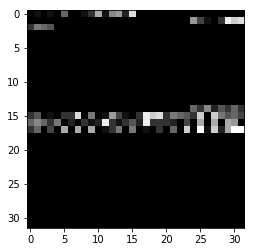

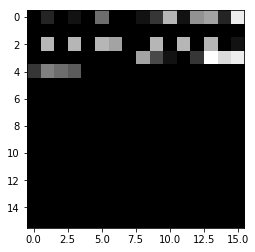

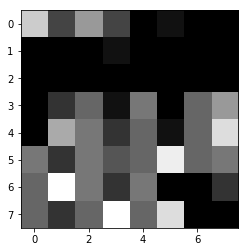

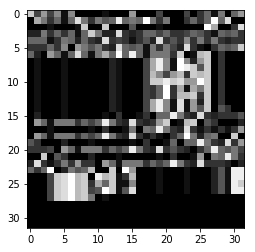

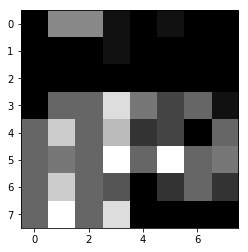

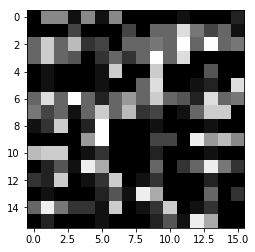

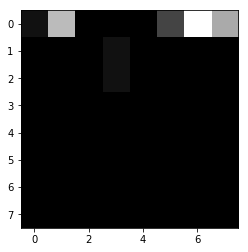

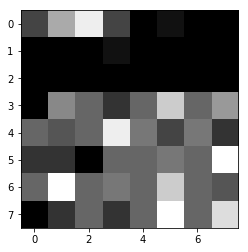

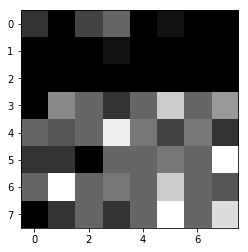



=====================WeMoSwitch\Setup-A-1-STA.pcap=====================



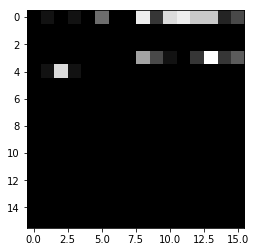

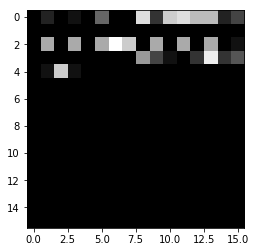

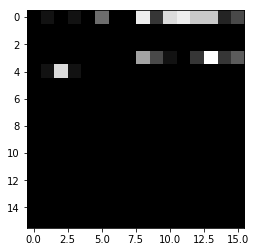

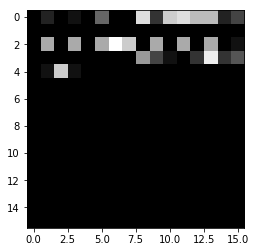

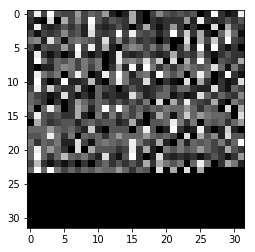

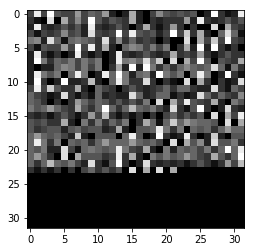

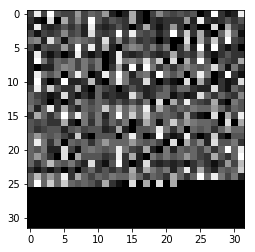

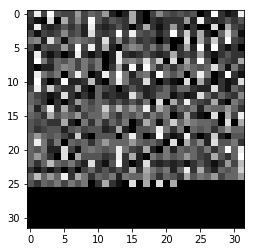

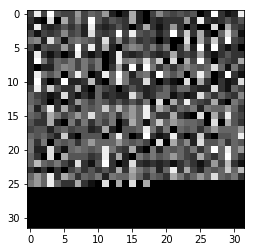

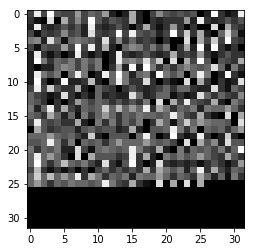

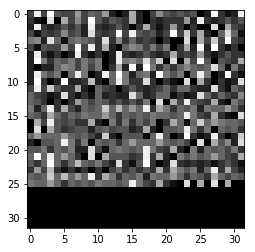



=====================Withings\Setup-A-1-STA.pcap=====================



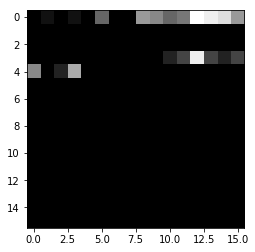

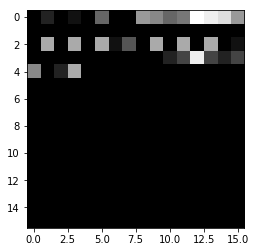

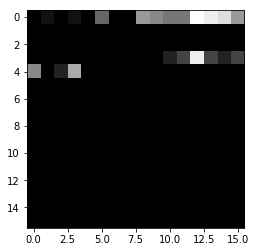

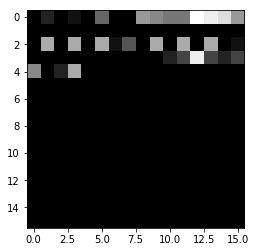

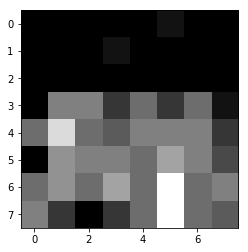

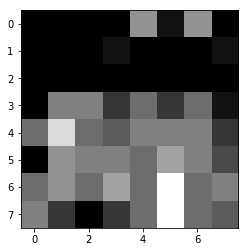

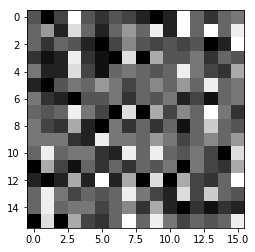

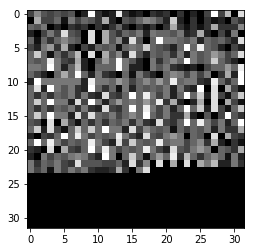

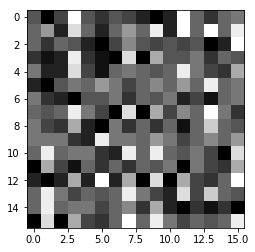

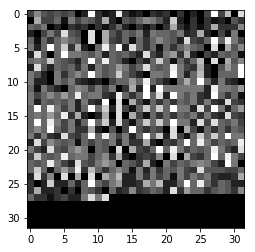

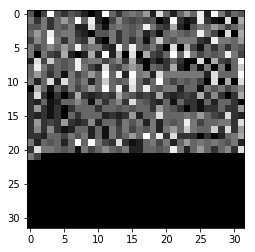

In [93]:
for i in files_add:
    payload_list=[]
    pkt = rdpcap(i)
    print("\n\n"+"====================="+ i[8:]+"====================="+"\n" )
    for j in pkt:
        listem=[]
        flag=0
        if j.haslayer(TCP):
            payload=j[TCP].payload.original
            flag=1
        elif j.haslayer(UDP):
            payload=j[UDP].payload.original
            flag=1
        if flag:
            temp=pcap2list(payload)
            if temp!=[]:
                payload_list.append(temp)
    new=[]        
    for ii in payload_list:
        if len(ii) >= 0 and  len(ii) <=  50:
            if len(ii) > 36:
                new.append(ii[0:36])
            else:
                new.append(pad(ii,36))
        elif len(ii) > 50 and  len(ii) <=  160:
            if len(ii) > 64:
                new.append(ii[0:64])
            else:
                new.append(pad(ii,64))
        elif len(ii) > 160 and  len(ii) <=  640:
            if len(ii) > 256:
                new.append(ii[0:256])
            else:
                new.append(pad(ii,256) )        
        else:
            if len(ii) > 1024:
                new.append(ii[0:1024])
            else:
                new.append(pad(ii,1024)  )
    temp=0
    for i in new:
        A = np.array(i)
        A = A.reshape(int(sqrt(len(i))),int(sqrt(len(i))))
        plt.imshow(A, cmap="gray")     
        plt.show()
        if temp==10:break
        temp+=1